In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fastai.vision import *

In [2]:
PATH = Path('data/fish/')
TEST = Path('data/test_stg1/')
TRAIN = Path('data/fish/train/')
PATH_STR = 'data/fish/train/'


In [3]:
# TEST.ls()

In [4]:
TRAIN.ls()


[PosixPath('data/fish/train/SHARK'),
 PosixPath('data/fish/train/ALB'),
 PosixPath('data/fish/train/NoF'),
 PosixPath('data/fish/train/BET'),
 PosixPath('data/fish/train/YFT'),
 PosixPath('data/fish/train/LAG'),
 PosixPath('data/fish/train/DOL'),
 PosixPath('data/fish/train/OTHER'),
 PosixPath('data/fish/train/BON')]

In [5]:
for idx,name in enumerate(os.listdir(TRAIN)):
    print(idx,name)

0 SHARK
1 ALB
2 NoF
3 BET
4 YFT
5 LAG
6 DOL
7 OTHER
8 BON


In [6]:
num_files = [(name,len(os.listdir(TRAIN/name))) for idx,name in enumerate(os.listdir(TRAIN)) if name != ".DS_Store"]

In [7]:
files_df = pd.DataFrame(num_files,columns=['folder','count'])


In [8]:
files_df


,folder,count
0,SHARK,50
1,ALB,50
2,NoF,50
3,BET,50
4,YFT,50
5,LAG,50
6,DOL,50
7,OTHER,50
8,BON,48


In [9]:
files_df['count'].sum()


448

<AxesSubplot:xlabel='folder', ylabel='count'>

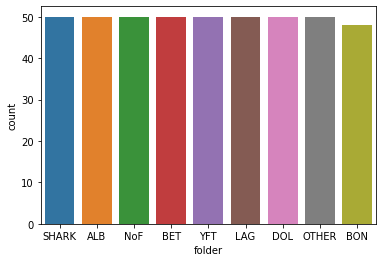

In [10]:
sns.barplot(x='folder',y='count',data=files_df)

In [11]:
os.listdir(TRAIN/'SHARK')[0]

'img_00685.jpg'

### Check image size

In [12]:
from PIL import Image
from glob import glob
train_files = [(name,os.listdir(TRAIN/'{}'.format(name))) for idx,name in enumerate(os.listdir(TRAIN)) if name != ".DS_Store"]

In [13]:
def get_sizes(files):
    '''Pass a list of file names and return image sizes'''
    sizes = []
    for folder in files:
        n = folder[0]
        f = folder[1]
        for files in f:
            image_file = PATH_STR+n+'/'+files
            with Image.open(image_file) as im:                
                sizes.append(im.size) # return value is a tuple, ex.: (1200, 800)
    return sizes

In [14]:
img_sizes = ['_'.join(map(str, s)) for s in get_sizes(train_files)]

In [15]:
sizes_df = pd.DataFrame(img_sizes,columns=['sizes'])
sizes_df.head()

,sizes
0,1280_974
1,1280_974
2,1280_750
3,1280_720
4,1280_974


In [16]:
c = sizes_df.reset_index().groupby('sizes')['index'].count().reset_index()
c

,sizes,index
0,1192_670,12
1,1244_700,1
2,1276_718,11
3,1280_720,246
4,1280_750,46
5,1280_924,2
6,1280_974,69
7,1334_750,2
8,1518_854,4
9,1732_974,7


[Text(0.5, 0, 'Sizes'), Text(0, 0.5, 'Count')]

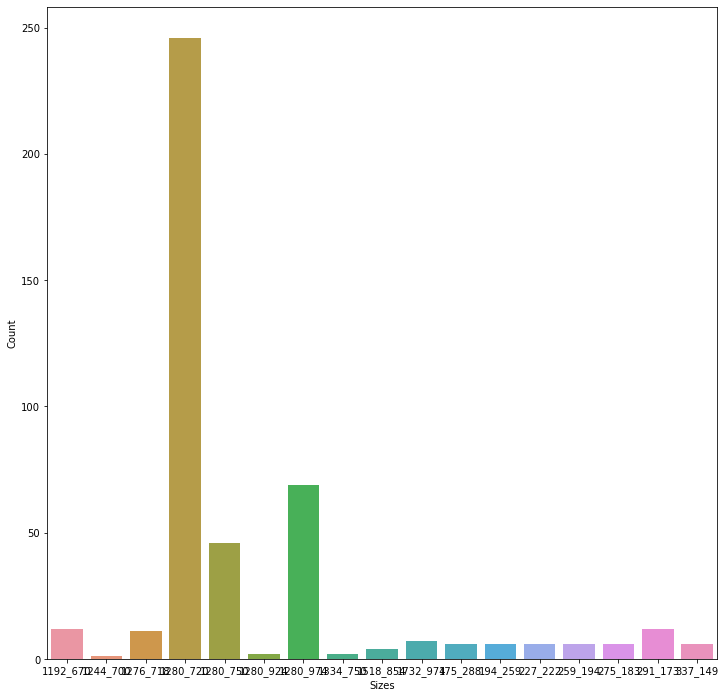

In [17]:
fig = plt.figure(figsize=(12,12))
ax = sns.barplot(x='sizes',y='index',data=c)
ax.set(xlabel='Sizes', ylabel='Count')

In [18]:
sample_sharks = [PATH_STR+'SHARK'+'/'+files for files in train_files[0][1][0:10]]


### Train model

In [19]:
src = ImageList.from_folder(path=TRAIN).split_by_rand_pct(0.2).label_from_folder()

In [20]:
tfms = get_transforms()

In [21]:
data = src.transform(tfms,size=(670,1192)).databunch(bs=8).normalize(imagenet_stats)


In [22]:
print(data.classes,data.c)


['ALB', 'BET', 'BON', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'] 9


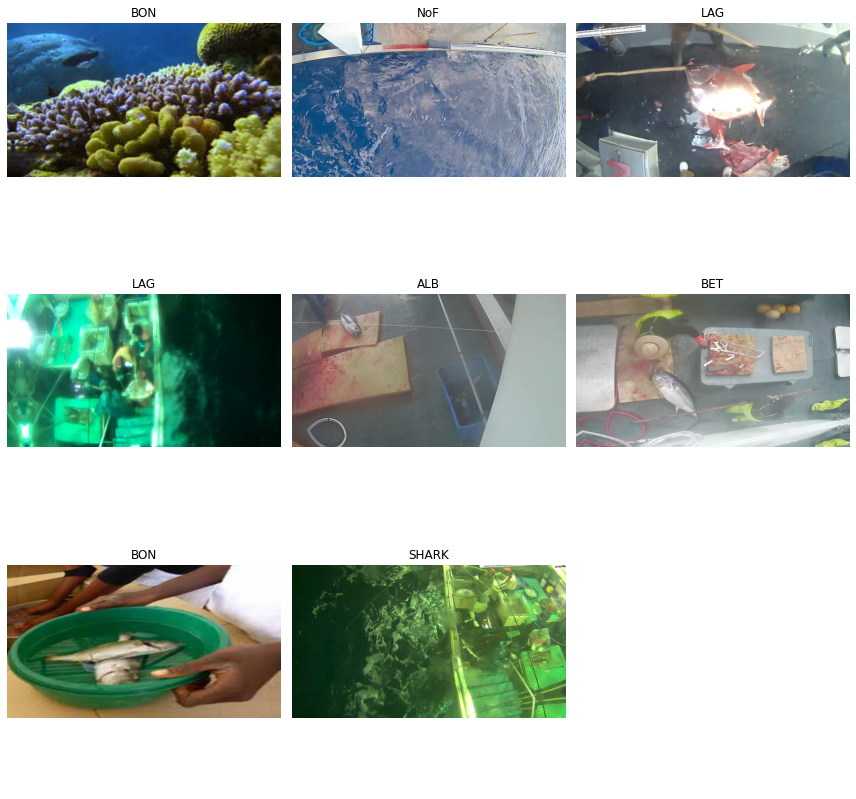

In [23]:
data.show_batch(rows=3)


In [24]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])


In [25]:
PathLikeOrBinaryStream??

In [ ]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.recorder.plot(suggestion=True)


In [ ]:
learn.fit_one_cycle(5,3e-3)


In [ ]:
learn.recorder.plot_losses()


In [ ]:
learn.save('stage1-fisheries')


In [ ]:
learn.unfreeze()


In [ ]:
learn.lr_find()


In [ ]:
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(5,slice(3e-5,3e-4))


In [ ]:
learn.save('stage2-fisheries')


In [ ]:
learn.export('export.pkl')


In [ ]:
sample_sub1.shape


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
interp.plot_confusion_matrix()


In [ ]:
interp.plot_top_losses(9, figsize=(7, 7))
